In [4]:
#Import some modules

import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.cm as mpl_cm
import os


First I've just replicated how you have read the files in, but modified it to point to copies of Arushi's netcdf files I have compied to my laptop to keep things simple.

In [5]:
directory = '/Users/ph290/Downloads/'

brewer_cmap = mpl_cm.get_cmap("brewer_OrRd_09")

# Load the cube data
cube_bot = iris.load_cube(directory+'historical_bottomtemperature_1960.nc')
print(cube_bot)
# Create a annual mean value of all daily means values
cube_bot_annmean = cube_bot.collapsed('time', iris.analysis.MEAN)

cube_sfc = iris.load_cube(directory+'historical_surfacetemperature_1960.nc')
print(cube_sfc)
# Create a annual mean value of all daily means values
cube_sfc_annmean = cube_sfc.collapsed('time', iris.analysis.MEAN)


unknown / (unknown)                 (time: 360; latitude: 70; longitude: 90)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Attributes:
          Conventions: CF-1.7
unknown / (unknown)                 (time: 360; latitude: 70; longitude: 90)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Attributes:
          Conventions: CF-1.7


/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/Users/ph290/opt/miniconda3/envs/mypython3/lib/python3.9/site-packages/iris/coords.py:1960: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


To produce the plot, let's start by looking at examples of plots on teh iris gallery pages:

https://scitools.org.uk/iris/docs/v2.4.0/gallery.html

The pair in the center of the screenshit below look like a good staring point, so I click on them...

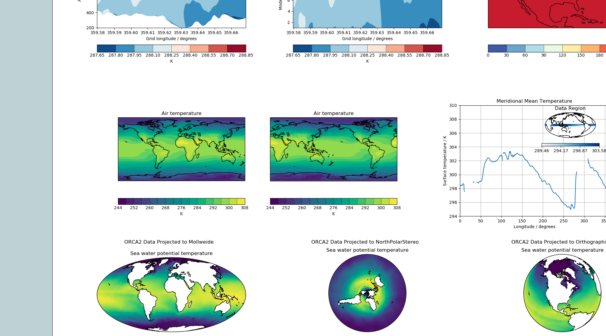

This takes us to the code example linked here: https://scitools.org.uk/iris/docs/v2.4.0/examples/General/global_map.html#global-map

To be honist, it is not the simplest example (a general criticism I have of teh iris documentation), but let;s stick with it and modify what we need to do to get things working. The raw code from teh web page is pasted below:

```
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt


def main():
    fname = iris.sample_data_path('air_temp.pp')
    temperature = iris.load_cube(fname)

    # Plot #1: contourf with axes longitude from -180 to 180
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    qplt.contourf(temperature, 15)
    plt.gca().coastlines()

    # Plot #2: contourf with axes longitude from 0 to 360
    proj = ccrs.PlateCarree(central_longitude=-180.0)
    plt.subplot(122, projection=proj)
    qplt.contourf(temperature, 15)
    plt.gca().coastlines()
    iplt.show()

if __name__ == '__main__':
```

Now let's edit this to do what we want it to do.

To achieve this I have commented out the bit that reads in teh file, because we have already done this. I also comment out the def main and '# if __name__ == '__main__':' bit because they overcomplicate things and Arushi doe snot need to worry about this.

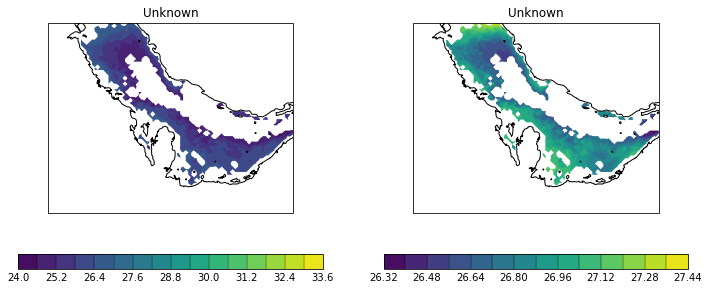

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import iris
import iris.plot as iplt
import iris.quickplot as qplt


# def main():
#     fname = iris.sample_data_path('air_temp.pp')
#     temperature = iris.load_cube(fname)

# Plot #1: contourf with axes longitude from -180 to 180
plt.figure(figsize=(12, 5))
plt.subplot(121)
qplt.contourf(cube_bot_annmean, 15)
plt.gca().coastlines()

# Plot #2: contourf with axes longitude from 0 to 360
proj = ccrs.PlateCarree(central_longitude=-180.0)
plt.subplot(122, projection=proj)
qplt.contourf(cube_sfc_annmean, 15)
plt.gca().coastlines()
plt.show()

# if __name__ == '__main__':

We can see that the above gives us to subplots with colour bars. Next let's make a change to make teh colour bars on the same scale

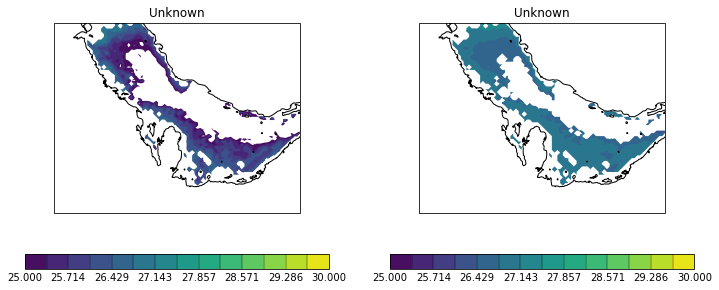

In [46]:
import numpy as np

my_colour_bar_min = 25.0
my_colour_bar_max = 30.0
number_of_color_steps = 15
color_range = np.linspace(my_colour_bar_min,my_colour_bar_max,number_of_color_steps)

# Plot #1: contourf with axes longitude from -180 to 180
plt.figure(figsize=(12, 5))
plt.subplot(121)
qplt.contourf(cube_bot_annmean, color_range)
plt.gca().coastlines()

# Plot #2: contourf with axes longitude from 0 to 360
proj = ccrs.PlateCarree(central_longitude=-180.0)
plt.subplot(122, projection=proj)
qplt.contourf(cube_sfc_annmean, color_range)
plt.gca().coastlines()
plt.show()



Now it gets a bit more complicated to start adding everything, but ask yourself what is actually required. If the figure caption tells us that this is the Persian Gulf, teh lat and lon info adds nothing of value. If the figure caption tells us that the figure shows temperature in degrees C, we don't need it on the colourbar. I want to see good science and evidence of intellectual engagement with the scientific problem rather than evidence that someone has spent hindreds of hours mastering teh intraciacies of plotting routines - this may well therefore be the right place to stop. BUT that dpeends on teh specific point you are trying to make with the plot - here I'm asusming it is a simple comparison of the pattern and magnitude of surface v. bottom temperatures. Maybe a better thing to think about here woudl be to plot the difference, e.g.

Text(0.5, 1.0, 'surface minus bottom temperature')

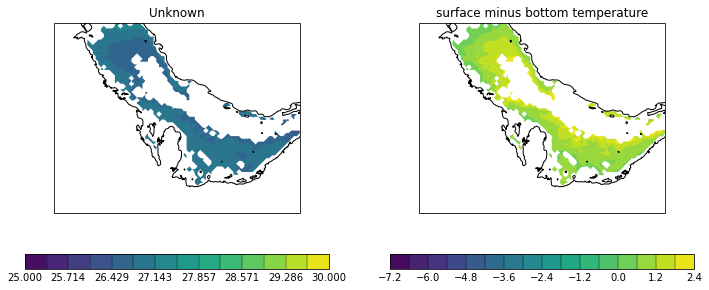

In [63]:
import numpy as np

my_colour_bar_min = 25.0
my_colour_bar_max = 30.0
number_of_color_steps = 15
color_range = np.linspace(my_colour_bar_min,my_colour_bar_max,number_of_color_steps)

# Plot #1: contourf with axes longitude from -180 to 180
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(121)
qplt.contourf(cube_sfc_annmean, color_range)
ax1.set_title('surface temperature')
plt.gca().coastlines()

# Plot #2: contourf with axes longitude from 0 to 360
proj = ccrs.PlateCarree(central_longitude=-180.0)
ax2 = plt.subplot(122, projection=proj)
qplt.contourf(cube_sfc_annmean - cube_bot_annmean, 15)
plt.gca().coastlines()
ax2.set_title('surface minus bottom temperature')
# iplt.show()



And just in case you want to get fancy...

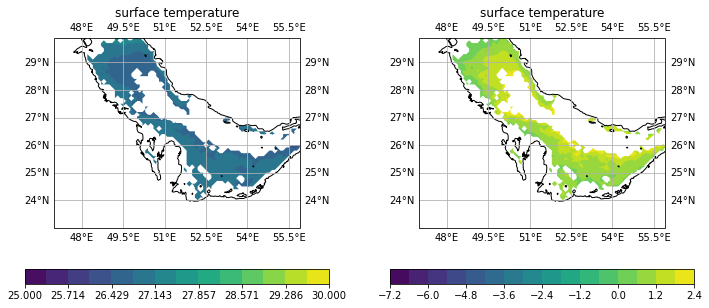

In [52]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

my_colour_bar_min = 25.0
my_colour_bar_max = 30.0
number_of_color_steps = 15
color_range = np.linspace(my_colour_bar_min,my_colour_bar_max,number_of_color_steps)

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
iplt.contourf(cube_sfc_annmean, color_range)
ax1.set_title('surface temperature')
ax1.gridlines(draw_labels=True)
plt.gca().coastlines()
plt.colorbar(orientation='horizontal')

ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
iplt.contourf(cube_sfc_annmean - cube_bot_annmean, 15)
ax2.set_title('surface minus bottom temperature')
ax2.gridlines(draw_labels=True)
plt.gca().coastlines()
plt.colorbar(orientation='horizontal')

plt.show()



And as above, but with lables for the color bar units and specifying the 'ticks' on teh color bar

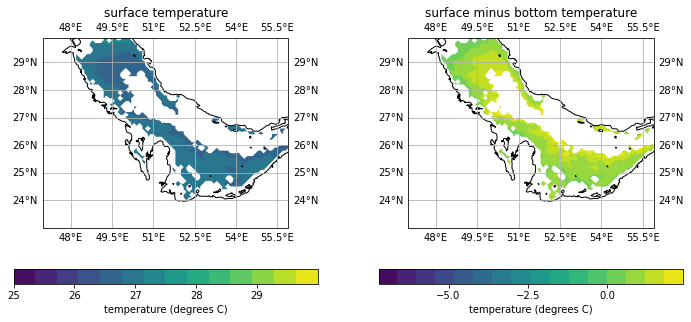

In [62]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

my_colour_bar_min = 25.0
my_colour_bar_max = 30.0
number_of_color_steps = 15
color_range = np.linspace(my_colour_bar_min,my_colour_bar_max,number_of_color_steps)

plt.figure(figsize=(12, 5))

ax1 = plt.subplot(121, projection=ccrs.PlateCarree())
iplt.contourf(cube_sfc_annmean, color_range)
ax1.set_title('surface temperature')
ax1.gridlines(draw_labels=True)
plt.gca().coastlines()
cbar = plt.colorbar(orientation='horizontal', ticks=[25, 26, 27, 28,29])
cbar.set_label('temperature (degrees C)')

ax2 = plt.subplot(122, projection=ccrs.PlateCarree())
iplt.contourf(cube_sfc_annmean - cube_bot_annmean, 15)
ax2.set_title('surface minus bottom temperature')
ax2.gridlines(draw_labels=True)
plt.gca().coastlines()
cbar2 = plt.colorbar(orientation='horizontal', ticks=[-5,-2.5,0])
cbar2.set_label('temperature (degrees C)')

plt.show()

